# Section 1  Getting the Data Ready 

#### Three main things to perform 
####     1. Split the data into features and labels (usually 'X' and 'y')
####     2. Filling (imputing) or disregarding missing values
####     3. Converting non-numerical values to numerical values (feature encoding)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('seaborn')

In [3]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Task 1 : splitting intop features and label

In [4]:
X = heart_disease.drop('target' , axis=1)
y = heart_disease['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
# Splitting features and labels into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    test_size=0.2
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 2 :  Converting non-numerical to numerical (feature encoding) 

In [7]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [9]:
car_sales.describe()

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


In [10]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.ensemble import RandomForestRegressor

model =  RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [12]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

category_list = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                 one_hot, category_list), ],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
# checking transformation 
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [14]:
# building another model 
np.random.seed(42)
X_train, X_test, y_train, y_test =  train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

###  3 : Filling and Dealing with Missing values

In [15]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [16]:
car_sales_missing.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [17]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [18]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
# method one 
for column in car_sales_missing.columns:
    if car_sales_missing[column].dtype == 'object':
        car_sales_missing[column] = car_sales_missing[column].fillna('missing')
    if car_sales_missing[column].dtype == 'float':
        car_sales_missing[column] = car_sales_missing[column].fillna(car_sales_missing[column].mean())
    car_sales_missing.dropna(inplace=True)
car_sales_missing.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [20]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [21]:
category_features = ['Make', 'Colour', "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                 one_hot, category_features)], 
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
812,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
813,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
814,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


#  

### Section 1.2 : Filling missing values with scikit-learn

In [22]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [23]:
# check for missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
# drop rows with missing labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [25]:
# split into X & y
X = car_sales_missing.drop('Price', axis=1)
y =  car_sales_missing['Price']

In [26]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical value with 'missing' and numerical with it's mean()
cat_fill = SimpleImputer(fill_value='missing', strategy='constant')
door_fill = SimpleImputer(fill_value=4, strategy='constant')
num_fill = SimpleImputer(strategy='mean')

# define columns
cat_columns = ['Make', 'Colour']
door_column = ['Doors']
num_column = ['Odometer (KM)']

# create an imputer (something that fills missing data)
imputers = ColumnTransformer([
    ('cat_features', cat_fill, cat_columns),
    ('door_features', door_fill, door_column),
    ('num_features', num_fill, num_column),
])

# transform the data
filled_X = imputers.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [27]:
# make a new dataframe from the filled data
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head(10)

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
5,Honda,Red,4,42652
6,Toyota,Blue,4,163453
7,Honda,White,4,130987
8,missing,White,4,130538
9,Honda,Blue,4,51029


In [28]:
# check for missing values in the new dataset
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

### Section 1. 3 :  Converting non-numerical to numerical (feature encoding) 

In [29]:
# converting non-numerical variables to numerical values

one_hot = OneHotEncoder() 

# columns to one_end encode
cat_columns = ['Make', "Colour", 'Doors']

# transform the columns 
transformer = ColumnTransformer([
    ('one_hot', one_hot, cat_columns),
], remainder='passthrough')

car_sales_transformed = transformer.fit_transform(car_sales_filled)
car_sales_transformed

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [30]:
# splitting into training and test sets 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(car_sales_transformed, y,
                                                   test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 15), (190, 15), (760,), (190,))

In [31]:
# training a model with five estimators
score = []
for estimators in range(1, 100, 25):
    model = RandomForestRegressor(n_estimators=estimators).fit(X_train, y_train)
    scores = model.score(X_test, y_test)
    score.append(scores)

print(score)

[-0.6388782608951278, 0.2019516493779656, 0.22586663323867517, 0.20765777221897586]


#  

# Task 2 : Choosing a estimator/algorithm for our problem
Check the sklearn-machine-learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

NB : Task 3 would deal with fitting the model

## Solving a regression problem using the boston dataset

In [32]:
from sklearn.datasets import load_boston
boston =  load_boston()

# turning into a dataset 
boston.keys()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target']) # adding a target column

boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [33]:
len(boston_df)

506

In [34]:
# Let's try the Rigde Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# create data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# create train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=42)

# Instantiate and fit  the model on
model = Ridge().fit(X_train, y_train)

# Check the score 
model.score(X_test, y_test)


0.7200369663975205

`Improve the model using another estimator ...` https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    

In [35]:
# Using the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.873969014117403

# Choosing an estimator for a Classification Problem
using the sklearn estimator map ...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [36]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
len(heart_disease)

303

In [38]:
# using linearsvc estimator class

from sklearn.svm import LinearSVC
np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=1000).fit(X_train, y_train)
clf.score(X_test, y_test)

/home/eclipse/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [39]:
#using ensemble classifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf =  RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

#  

# Task 4 : Making Predictions with a Model 
2 ways to make predictions :

    1. Predict()
    2. predict_proba()

###  Making Predictions on Classsification Models

#### Method 1 :  using the `predict() function `

In [40]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
# finding the mean of the predictions
np.mean(y_test == y_preds)

0.8524590163934426

####  Method 2 : Using the `predict_proba() function`

In [42]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [43]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### Making prediction on Regression Models

In [44]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestRegressor().fit(X_train , y_train)
clf.score(X_test, y_test)

0.873969014117403

In [45]:
y_preds = clf.predict(X_test)
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [46]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [47]:
np.mean(y_preds == y_test)

0.0

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

#  

# Task 5 : Evaluating a Machine Learning Model
#### Three ways to evaluate sklearn estimators/models 
####    1. Estimator `score` method
####    2. The `scoring` parameter
####    3. Problem-specific function 

#### Method 1 : using the `score` method

In [49]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, random_state=42)
clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [50]:
# classification model
clf.score(X_test, y_test)

0.8524590163934426

In [51]:
# checking for a regression problem
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestRegressor().fit(X_train , y_train)
clf.score(X_test, y_test)

0.873969014117403

####  Method 2 : Using the `scoring parameter` method

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, random_state=42)
clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [53]:
clf.score(X_test, y_test)

0.8524590163934426

In [54]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [55]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

#  

####  Method 2.1 : Classification model evaluation metrics
#####    1. `Accuracy`
#####    2. `Area under ROC curve`
#####    3. `Confusion metrix`
#####    4. `Classification report`

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, random_state=42)
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

#####  1. Accuracy

In [57]:
print(f'Heart disease classification accuracy score {np.mean(cross_val_score)*100:.2f}%')

Heart disease classification accuracy score 80.18%


#  

#####  2. Area under ROC curve

######  2.1 Reciever Operational curve (ROC) : This compares the true positive rate (tpr) and the false positive rate (fpr) of the model

In [58]:
# Building a classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [59]:
# making a prediction probanility
y_preds = clf.predict_proba(X_test)
y_preds[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [60]:
# using only the true prediction probabilities

y_preds_positives = y_preds[:, 1]
y_preds_positives[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [61]:
# getting the fpr, tpr and the thresholds vaelues using the roc_curve function

fpr, tpr, thresholds  = roc_curve(y_test, y_preds_positives)

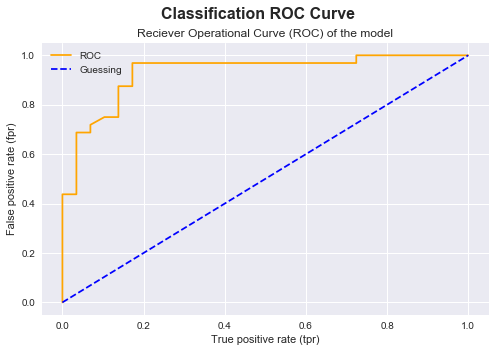

In [62]:
# plotting the area under the curve (ROC)

def plot_roc_curve(fpr, tpr):
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Guessing')
    ax.set(title='Reciever Operational Curve (ROC) of the model',
          xlabel='True positive rate (tpr)',
          ylabel='False positive rate (fpr)')
    plt.legend()
    plt.suptitle("Classification ROC Curve", fontsize=16, fontweight='bold')
    plt.show()
plot_roc_curve(fpr, tpr)

In [63]:
# auc curve
print(f'Area under the curve score for the model : {roc_auc_score(y_test, y_preds_positives)}')

Area under the curve score for the model : 0.9304956896551724


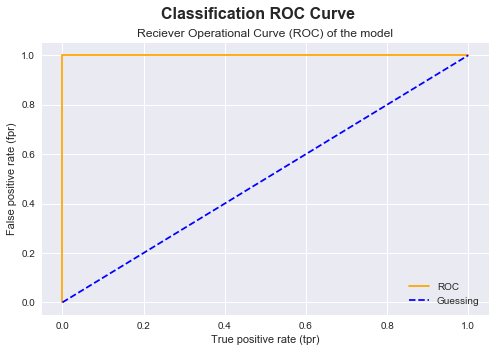

Score for a perfect area under the curve : 1.0


In [64]:
# plotting a perfect ROC curve
fpr, tpr, thresholds  = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)
print(f'Score for a perfect area under the curve : {roc_auc_score(y_test, y_test)}')

##### 3. Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essencs, giving you an idea of where the model is getting confused

In [91]:
from sklearn.metrics import confusion_matrix
# A confusion matric can be visualized by either using a pd.crosstabs function or seaborn's hetmap()
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[24,  5],
       [ 4, 28]])

In [93]:
# using pd.crosstab to visualize confusion_matrix
pd.crosstab(y_test, y_preds, rownames=['Actual class'], 
           colnames=['predicted class'])

predicted class,0,1
Actual class,,
0,24,5
1,4,28


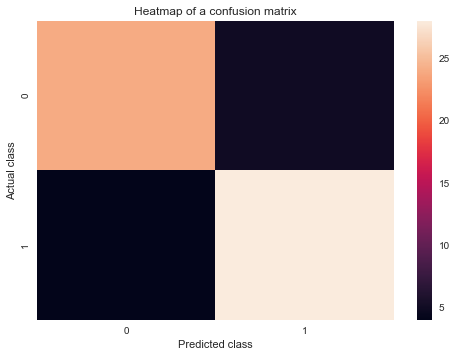

In [100]:
# using seaborn's heatmap
import seaborn as sns
sns.heatmap(conf_mat)
plt.title('Heatmap of a confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

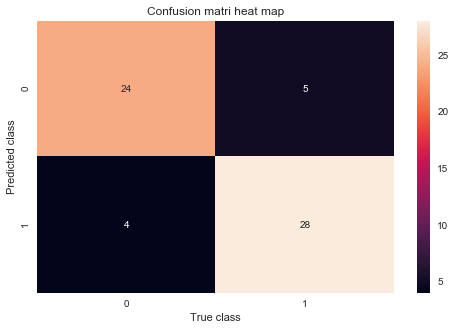

In [101]:
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.heatmap(conf_mat, annot=True, 
                    )
    ax.set(title='Confusion matri heat map', 
          xlabel='True class', 
          ylabel='Predicted class')
    plt.show()
plot_conf_mat(conf_mat)

##### 4. Classification Report 
Collection of different classification metrics

In [107]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000


###  5.2.2 : Regression model evaluation metrics